# Automatic Ticket Classification Case Study

## Problem Statement

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [29]:
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
# Opening JSON file
# Path to your data file and load it
f =  open('/content/gdrive/MyDrive/Datasets/Automatic_Ticket_Classification/complaints-2021-05-14_08_16.json')

# returns JSON object as a dictionary
data = json.load(f)
df=pd.json_normalize(data)

## Data Preparation

In [32]:
# Inspect the dataframe to understand the given data.
df.head(15)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [33]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [34]:
#Assign new column names
df = df[['_source.complaint_what_happened', '_source.product', '_source.sub_product',]]
df.head(5)

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [35]:
# Making more user-friendly column names
df = df.rename(columns={'_source.complaint_what_happened':'complaint_text', '_source.product': 'category', '_source.sub_product':'sub_category'})
df.head()

,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [36]:
# merging category & sub-category
df['category'] = df['category']+'+'+df['sub_category']
df.head(5)

,complaint_text,category,sub_category
0,,Debt collection+Credit card debt,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...,General-purpose credit card or charge card
3,,Mortgage+Conventional home mortgage,Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...,General-purpose credit card or charge card


In [37]:
df.drop(['sub_category'], axis=1, inplace=True)
df.head(5)

,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [38]:
# Checking nan values
df.complaint_text.isnull().sum()

0

In [39]:
# Checking empty string complaints
len(df[df['complaint_text']==''])

57241

In [40]:
df['complaint_text'][df['complaint_text']=='']

0         
3         
4         
5         
6         
        ..
78304     
78305     
78306     
78307     
78308     
Name: complaint_text, Length: 57241, dtype: object

In [41]:
# Assign nan in place of blanks in the complaints column
df['complaint_text'][df['complaint_text']==''] = np.nan
df.head(5)

,complaint_text,category
0,NaN,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,NaN,Mortgage+Conventional home mortgage
4,NaN,Credit card or prepaid card+General-purpose cr...


In [42]:
#Remove all rows where complaints column is nan
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

## Text Processing - preparing the text for topic modelling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [43]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
  # lowercase
  text = text.lower()

  # removing text in square brackets
  text = re.sub('\[.*\]','',text).strip()

  # removing punctuations
  text = text.translate(str.maketrans('','',string.punctuation))

  # removing words containing numbers
  text = re.sub('\S*\d\S*\s*','',text).strip()

  return text.strip()


In [44]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head(10)

1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and was told b...
10    chase card was reported on however fraudulent ...
11    on while trying to book a xxxx  xxxx  ticket i...
14    my grand son give me check for i deposit it in...
15                        can you please remove inquiry
17    with out notice jp morgan chase restricted my ...
20    during the summer months i experience a declin...
21    on xxxx i made a payment to an online retailer...
23    i have a chase credit card which is incorrectl...
Name: complaint_text, dtype: object

In [45]:
#Write your function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words

def lemmatizer(text):
  doc = nlp(text)
  sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]

  return ' '.join(sent)

In [46]:
df['lemma'] = df.complaint_text.apply(lambda x:lemmatizer(x))
df.head()

,complaint_text,category,lemma
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...


In [47]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df_clean = df[['complaint_text', 'category', 'lemma']]

In [48]:
df_clean

,complaint_text,category,lemma
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...
...,...,...,...
78303,after being a chase card customer for well ove...,Credit card or prepaid card+General-purpose cr...,chase card customer decade offer multiple soli...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,Credit card or prepaid card+General-purpose cr...,wednesday xxxxxxxx call chas xxxx xxxx visa cr...
78310,i am not familiar with xxxx pay and did not un...,Checking or savings account+Checking account,familiar xxxx pay understand great risk provid...
78311,i have had flawless credit for yrs ive had cha...,Credit card or prepaid card+General-purpose cr...,flawless credit yrs ve chase credit card cha...


In [49]:
#Write your function to extract the POS tags

def pos_tag(text):
  # write your code here
  doc = nlp(text)
  sent = [token.text for token in doc if token.tag_ == 'NN']

  return ' '.join(sent)

# Saving lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean["complaint_POS_removed"] =  df_clean.lemma.apply(lambda x: pos_tag(x))

In [50]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_text,category,lemma,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...,chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...,book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...,son deposit chase account fund bank account pa...
...,...,...,...,...
78303,after being a chase card customer for well ove...,Credit card or prepaid card+General-purpose cr...,chase card customer decade offer multiple soli...,chase card customer decade solicitation credit...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,Credit card or prepaid card+General-purpose cr...,wednesday xxxxxxxx call chas xxxx xxxx visa cr...,credit card provider ask claim purchase protec...
78310,i am not familiar with xxxx pay and did not un...,Checking or savings account+Checking account,familiar xxxx pay understand great risk provid...,xxxx risk consumer year trust mobile banking t...
78311,i have had flawless credit for yrs ive had cha...,Credit card or prepaid card+General-purpose cr...,flawless credit yrs ve chase credit card cha...,credit yrs credit card chase freedom problem t...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.




(array([9.235e+03, 6.357e+03, 2.724e+03, 1.277e+03, 7.580e+02, 2.740e+02,
        1.500e+02, 7.100e+01, 6.300e+01, 3.900e+01, 3.700e+01, 1.300e+01,
        1.100e+01, 1.100e+01, 8.000e+00, 8.000e+00, 7.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0. ,   248.5,   497. ,   745.5,   994. ,  1242.5,  1491. ,
         1739.5,  1988. ,  2236.5,  2485. ,  2733.5,  2982. ,  3230.5,
         3479. ,  3727.5,  3976. ,  4224.5,  4473. ,  4721.5,  4970. ,
         5218.5,  5467. ,  5715.5,  5964. ,  6212.5,  6461. ,  6709.5,
         6958. ,  7206.5,  7455. ,  7703.5,  7952. ,  8200.5,  8449. ,
         8697.5,  894

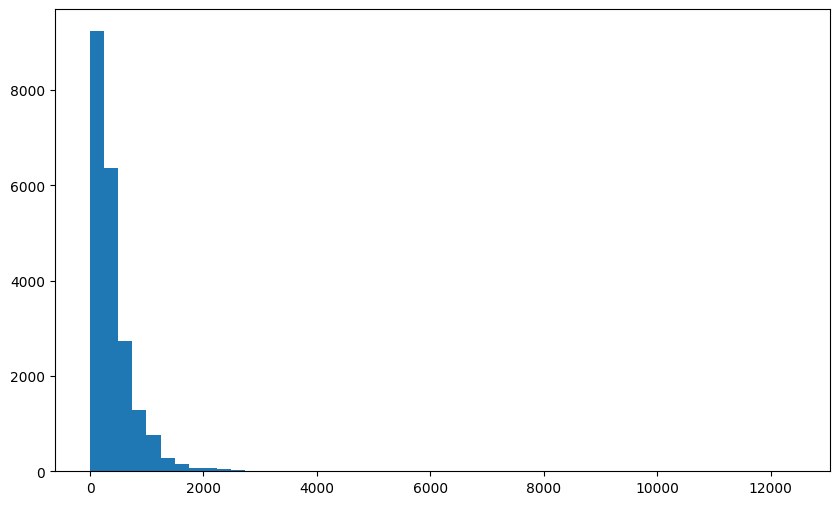

In [51]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)

#### Find the top 40 words by frequency among all the articles after processing the text.

In [52]:
!pip install wordcloud

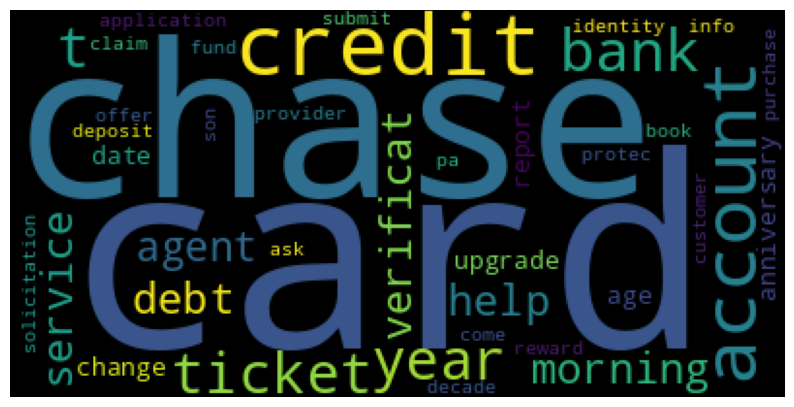

In [53]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stopwords,max_words=40).generate(str(df_clean.complaint_POS_removed))

print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [57]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean = df_clean.drop(['complaint_POS_removed'],axis = 1)

#### Find the top unigrams, bigrams and trigrams by frequency among all the complaints after processing the text.

In [58]:
def top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [59]:
# Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).
top_30_unigrams = top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)

In [60]:
# Top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]

Top 10 unigrams:



[('chase', 53415),
 ('account', 40962),
 ('credit', 33554),
 ('xxxx', 31273),
 ('card', 29835),
 ('payment', 21064),
 ('bank', 17034),
 ('time', 15871),
 ('charge', 15292),
 ('day', 12831)]

In [61]:
# Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
top_30_bigrams  = top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30)

In [62]:
#Print the top 10 words in the bigram frequency
print('Top 10 bigrams:\n')
top_30_bigrams[:10]

Top 10 bigrams:



[('credit card', 12773),
 ('credit report', 3893),
 ('chase credit', 3070),
 ('customer service', 2923),
 ('account chase', 2432),
 ('chase bank', 2119),
 ('check account', 2113),
 ('chase account', 2034),
 ('xxxx xxxx', 1955),
 ('contact chase', 1893)]

In [63]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).
top_30_trigrams = top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)

In [64]:
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('chase credit card', 2196),
 ('credit card account', 1050),
 ('credit card company', 978),
 ('credit card chase', 738),
 ('xxxx credit card', 652),
 ('chase customer service', 559),
 ('inquiry credit report', 483),
 ('credit card credit', 438),
 ('charge credit card', 406),
 ('credit card xxxx', 385)]

### The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [65]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [66]:
# All masked texts have been removed
df_clean.head(10)

,complaint_text,category,lemma,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...,chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...,book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...,son deposit chase account fund bank account pa...
15,can you please remove inquiry,"Credit reporting, credit repair services, or o...",remove inquiry,inquiry
17,with out notice jp morgan chase restricted my ...,Checking or savings account+Checking account,notice jp morgan chase restrict account debit ...,account debit card branch customer service rep...
20,during the summer months i experience a declin...,Vehicle loan or lease+Loan,summer month experience decline income employm...,summer month experience income employment requ...
21,on xxxx i made a payment to an online retailer...,"Money transfer, virtual currency, or money ser...",xxxx payment online retailer chase quick pay x...,payment retailer chase pay website scam websi...
23,i have a chase credit card which is incorrectl...,Credit card or prepaid card+General-purpose cr...,chase credit card incorrectly report datum cre...,chase credit card datum credit report company ...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [67]:
# Write your code here to initialise the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [68]:
# Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean)

In [69]:
tfidf.get_feature_names_out()[:10]

array(['aarp', 'abandonment', 'abatement', 'abbreviation', 'abd',
       'abhorrent', 'abide', 'ability', 'abovementione', 'abovereference'],
      dtype=object)

Reference for Attribute Error:
https://stackoverflow.com/questions/70215049/attributeerror-tfidfvectorizer-object-has-no-attribute-get-feature-names-out

In [70]:
len(tfidf.get_feature_names_out())

6483

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

In [71]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [72]:
#Load your nmf_model with the n_components i.e 5
# The value you want to test out
num_topics = 5

# Keeping the random_state = 40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [ ]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

In [73]:
#Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

print(vocab)
print(topics)

['aarp' 'abandonment' 'abatement' ... 'zombie' 'zone' 'zoom']
['account check money bank deposit chase fund day branch transfer number business transaction customer claim', 'card credit chase balance account score limit year purchase point month application service reason time', 'payment loan mortgage chase month modification time home pay year rate balance property statement date', 'report inquiry credit information company reporting debt account file identity remove dispute theft score letter', 'charge dispute fee chase transaction merchant claim purchase refund fraud service email time contact statement']


In [74]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df_clean.Complaint_clean))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()


,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.03,0.00,0.02,0.02,0.01,0
Doc1,0.01,0.02,0.00,0.00,0.01,1
Doc2,0.00,0.03,0.00,0.04,0.00,3
Doc3,0.02,0.03,0.01,0.05,0.01,3
Doc4,0.07,0.00,0.01,0.00,0.00,0


In [75]:
#Assign the best topic to each of the cmplaints in Topic Column
# Assigning topics to each rows.
df_clean['Topic'] = significant_topic

In [76]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-76-0891b765a168>:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [77]:
df_clean[['complaint_text','Complaint_clean','category','Topic']].head(20)

,complaint_text,Complaint_clean,category,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Debt collection+Credit card debt,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,card agent upgrade anniversary date change agent information order account anniversary date agent,Credit card or prepaid card+General-purpose credit card or charge card,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report application submit identity consent service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports+Other personal consumer report",3
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,book ticket come offer ticket reward card information minute notify screen decision chase bank notification screen representative speak application state information credit offer account statement purchase ticket account ask application representative oblige application request proceed application chase fact credit account report credit report chase information credit report process application consent error,"Credit reporting, credit repair services, or other personal consumer reports+Credit reporting",3
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxx

In [78]:
#Print the first 5 Complaint for each of the Topics
df_clean5=df_clean[['complaint_text','Complaint_clean','category','Topic']].groupby('Topic').head(5)
df_clean5.sort_values('Topic')

,complaint_text,Complaint_clean,category,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Debt collection+Credit card debt,0
24,mishandling of this account by chase auto and xxxx,mishandle account chase auto,Vehicle loan or lease+Loan,0
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document i am not being a shored or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document this situation is truly affecting my livelihood and they dont seem to want to deal with me professionally thank you,account debit card branch customer service representative account branch remove fund deposit place employment return bank customer service representative fund post business day branch retrieve fund look account fund reverse statement business day state withdraw bank teller chase mail check business day recover fund owe account bind fee rent car payment write notice thing peace mind fact chase situation bank teller inform account look know account time notice form document shore write notice thing peace mind fact chase situation bank teller inform account look know account time notice form document situation livelihood deal,Checking or savings account+Checking account,0
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son cal

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [79]:
# Creating the dictionary of Topic names and Topics
Topic_name = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

In [80]:
Topic_name

{0: 'Bank Account services',
 1: 'Credit card or prepaid card',
 2: 'Others',
 3: 'Theft/Dispute Reporting',
 4: 'Mortgage/Loan'}

In [81]:
df_clean['Topic']

1        0
2        1
10       3
11       3
14       0
        ..
78303    1
78309    4
78310    3
78311    1
78312    2
Name: Topic, Length: 21072, dtype: int64

In [82]:
# Replacing topic with topic name
df_clean['Topic'] = df_clean['Topic'].map(Topic_name)
df_clean['Topic']

1        Bank Account services      
2        Credit card or prepaid card
10       Theft/Dispute Reporting    
11       Theft/Dispute Reporting    
14       Bank Account services      
                 ...                
78303    Credit card or prepaid card
78309    Mortgage/Loan              
78310    Theft/Dispute Reporting    
78311    Credit card or prepaid card
78312    Others                     
Name: Topic, Length: 21072, dtype: object

In [83]:
df_clean.head(10)

,complaint_text,category,lemma,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Bank Account services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Credit card or prepaid card+General-purpose credit card or charge card,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,"Credit reporting, credit repair services, or other personal consumer reports+Other personal consumer report",chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,Theft/Dispute Reporting
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,"Credit reporting, credit repair services, or other personal consumer reports+Credit reporting",try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immedi

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [84]:
# Create the dictionary again of Topic names and Topics

Topic_name = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}

In [85]:
Topic_name

{'Bank Account services': 0,
 'Credit card or prepaid card': 1,
 'Others': 2,
 'Theft/Dispute Reporting': 3,
 'Mortgage/Loan': 4}

In [86]:
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_name)
df_clean['Topic']

1        0
2        1
10       3
11       3
14       0
        ..
78303    1
78309    4
78310    3
78311    1
78312    2
Name: Topic, Length: 21072, dtype: int64

In [87]:
df_clean.head()

,complaint_text,category,lemma,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Credit card or prepaid card+General-purpose credit card or charge card,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,"Credit reporting, credit repair services, or other personal consumer reports+Other personal consumer report",chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,3
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,"Credit reporting, credit repair services, or other personal consumer reports+Credit reporting",try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immediately contact xxxx refer chase bank immediately contact chase bank g

In [88]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data= df_clean[['complaint_text','Topic']]

In [89]:
training_data.head(10)

,complaint_text,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,3
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,3
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0
15,can you please remove inquiry,3
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days 

#### Applying the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

In [91]:
# Splitting X and y
X = training_data.complaint_text
y = training_data.Topic

# Getting the Vector count
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

# Transforming the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [94]:
# Write your code here to build any 3 models and evaluate them using the required metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [95]:
# Creating function to display the model report
def display_classification_report(model,metric):

    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')

    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)

    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))

    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)

    model_report_train = classification_report(y_train,y_train_pred)
    model_report_test = classification_report(y_test,y_test_pred)

    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)


    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)

    plt.show();

### Stratified KFold Cross Validation

In [98]:
# Creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

### Custom GridSearchCV

In [99]:
# Function for getting the GridSearchCV object
def grid_search(model,folds,params,scoring):

    grid_search = GridSearchCV(model,
                                cv=folds,
                                param_grid=params,
                                scoring=scoring,
                                n_jobs=-1, verbose=1)
    return grid_search

In [100]:
# Function to display the best score and parameters of the GridSearchCV model
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

### Multinomial Naive Bayes Classification

ROC AUC Score Train: 0.95
ROC AUC Score Test: 0.94
Train Accuracy : 0.68
Test Accuracy : 0.65
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.56      0.96      0.71      4331
           1       0.81      0.49      0.61      3109
           2       0.74      0.89      0.81      3801
           3       0.98      0.20      0.34      1633
           4       0.88      0.47      0.61      2930

    accuracy                           0.68     15804
   macro avg       0.79      0.60      0.62     15804
weighted avg       0.75      0.68      0.66     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.53      0.94      0.68      1444
           1       0.79      0.43      0.55      1037
           2       0.71      0.85      0.77      1267
           3       0.94      0.17      0.29       544
           4       0.86      0.43      0.58       976

    accuracy            

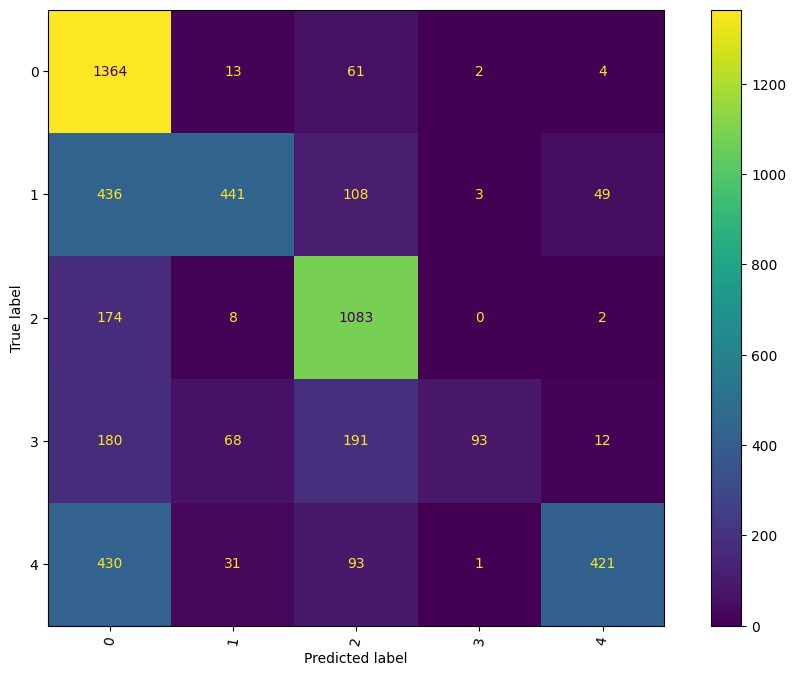

In [101]:
# MNB model object
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Display classification report
metric1=[]
display_classification_report(mnb,metric1)

### Logistic Regression Classification

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.95
Test Accuracy : 0.9
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4331
           1       0.95      0.94      0.95      3109
           2       0.95      0.98      0.96      3801
           3       0.95      0.88      0.91      1633
           4       0.94      0.92      0.93      2930

    accuracy                           0.95     15804
   macro avg       0.95      0.94      0.94     15804
weighted avg       0.95      0.95      0.95     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1444
           1       0.90      0.88      0.89      1037
           2       0.90      0.95      0.93      1267
           3       0.92      0.82      0.87       544
           4       0.90      0.86      0.88       976

    accuracy              

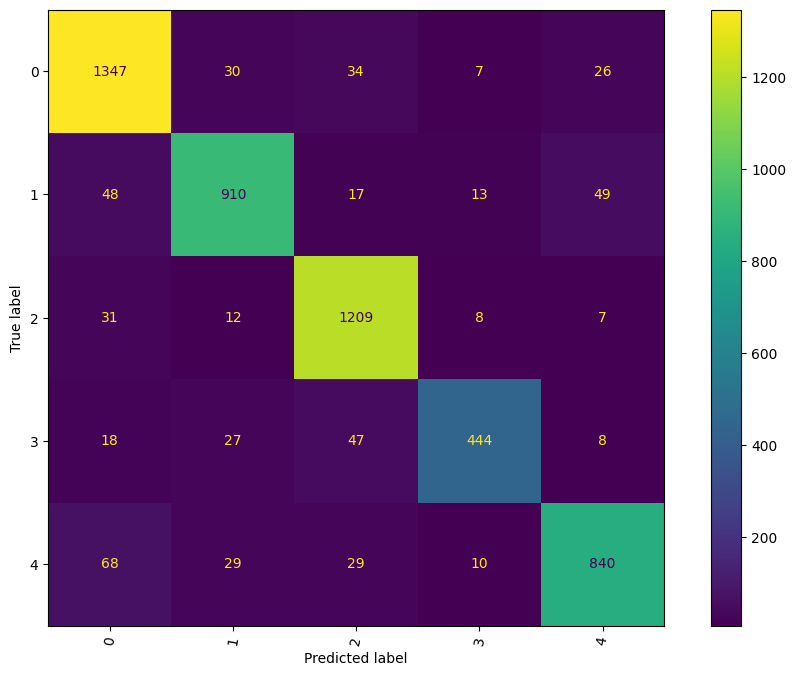

In [102]:
# Logistic Regression Classification
log_reg = LogisticRegression(random_state=40,solver='liblinear')

# fit model
log_reg.fit(X_train,y_train)

# display classification report
metric2=[]
display_classification_report(log_reg,metric2)

### Decision Tree Classification

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.86
Train Accuracy : 1.0
Test Accuracy : 0.77
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4331
           1       1.00      1.00      1.00      3109
           2       1.00      1.00      1.00      3801
           3       1.00      1.00      1.00      1633
           4       1.00      1.00      1.00      2930

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1444
           1       0.78      0.76      0.77      1037
           2       0.84      0.82      0.83      1267
           3       0.73      0.74      0.73       544
           4       0.69      0.73      0.71       976

    accuracy              

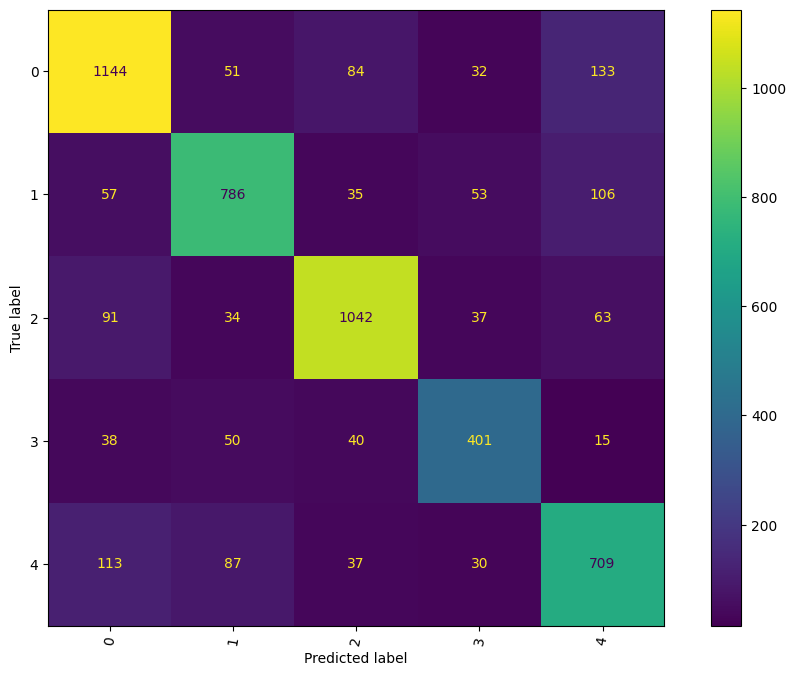

In [103]:
# Decision Tree Classification
dtc = DecisionTreeClassifier(random_state=40)

# fit model
dtc.fit(X_train,y_train)

# Decision Tree Classification Report
metric3=[]
display_classification_report(dtc,metric3)

### Random Forest Classification

OOB SCORE : 0.8259934193874968
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.98
Train Accuracy : 1.0
Test Accuracy : 0.83
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4331
           1       1.00      1.00      1.00      3109
           2       1.00      1.00      1.00      3801
           3       1.00      1.00      1.00      1633
           4       1.00      1.00      1.00      2930

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1444
           1       0.83      0.77      0.80      1037
           2       0.86      0.90      0.88      1267
           3       0.91      0.70      0.79       544
           4       0.85      0.72      0.78       

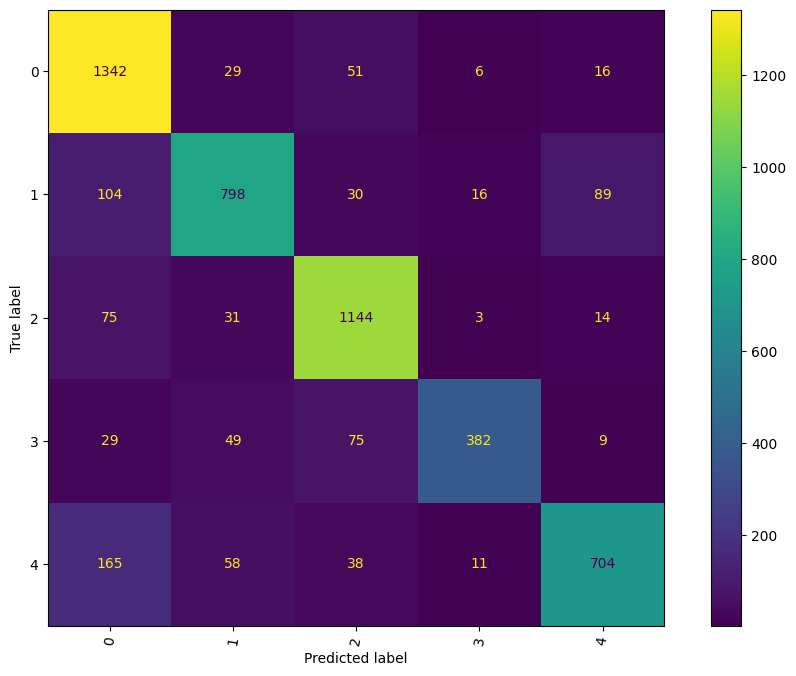

In [104]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 500,random_state=40, n_jobs = -1,oob_score=True)

# fit model
rf.fit(X_train,y_train)

# oob score
print('OOB SCORE :',rf.oob_score_)

# Random Forest Classification Report
metric4=[]
display_classification_report(rf,metric4)

### Multinomial Naive Bayes with GridSearchCV

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score:  0.7553151742558636
Best Hyperparameters:  {'alpha': 0.1}
ROC AUC Score Train: 0.98
ROC AUC Score Test: 0.95
Train Accuracy : 0.85
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      4331
           1       0.84      0.78      0.81      3109
           2       0.86      0.91      0.88      3801
           3       0.89      0.71      0.79      1633
           4       0.88      0.80      0.84      2930

    accuracy                           0.85     15804
   macro avg       0.86      0.83      0.84     15804
weighted avg       0.85      0.85      0.85     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79      1444
           1       0.73      0.64      0.68      1037
           2       0.79      0.86      0.82      1267
   

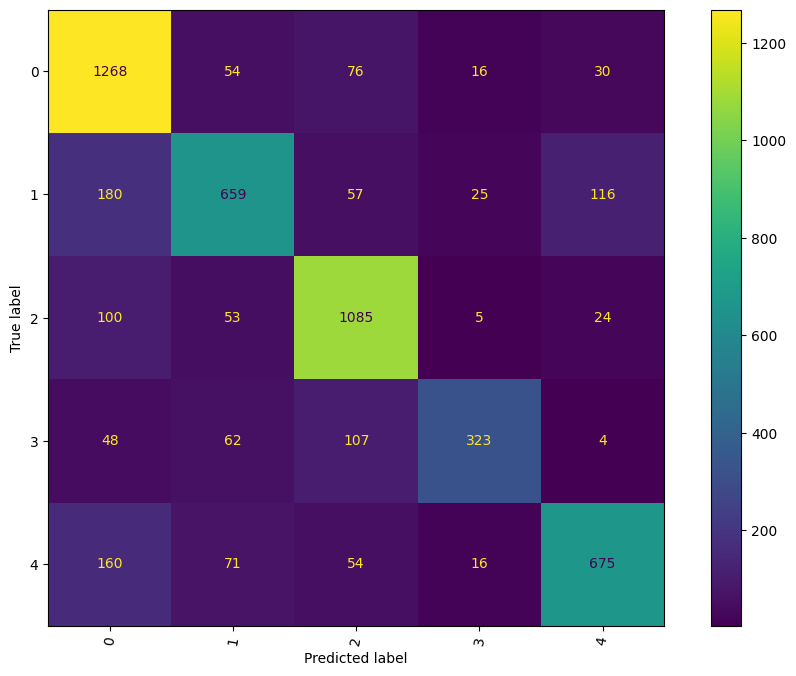

In [105]:
# Multinomial Naive Bayes with GridSearchCV
mnb = MultinomialNB()
mnb_params = {
'alpha': (1, 0.1, 0.01, 0.001, 0.0001)
}

# create gridsearch object
grid_search_mnb = grid_search(mnb, folds, mnb_params, scoring=None)

# fit model
grid_search_mnb.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_mnb)

# Random Forest Classification Report
metric5=[]
display_classification_report(grid_search_mnb,metric5)

### Logistic Regression with GridSearchCV

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best Score:  0.9247021652337228
Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.94
Test Accuracy : 0.92
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4331
           1       0.94      0.94      0.94      3109
           2       0.96      0.96      0.96      3801
           3       0.93      0.90      0.91      1633
           4       0.93      0.92      0.92      2930

    accuracy                           0.94     15804
   macro avg       0.94      0.93      0.93     15804
weighted avg       0.94      0.94      0.94     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1444
           1       0.92      0.91      0.92      1037
           2       0.93      0.96      0.95      1267
           3       0.91      0.90  

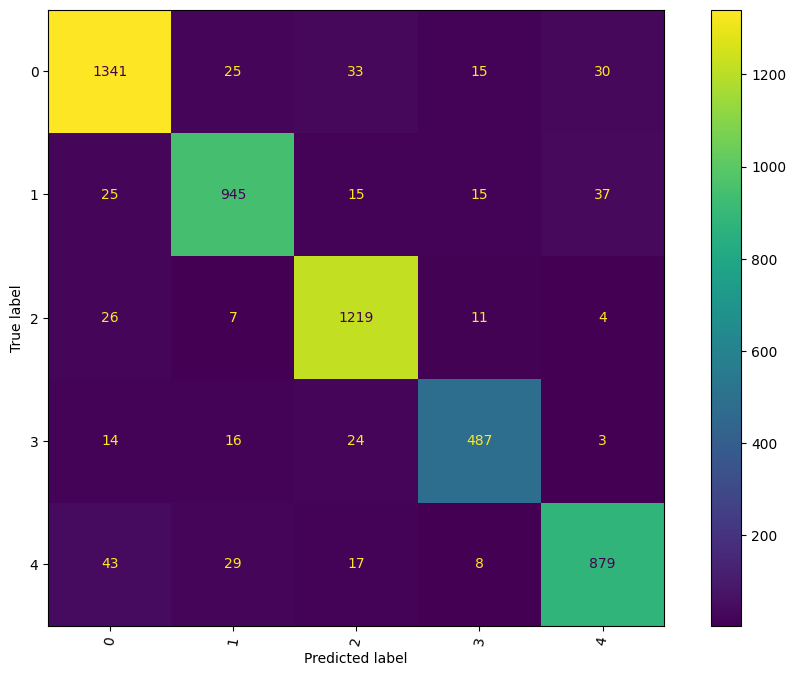

In [106]:
# logistic regression
log_reg = LogisticRegression()

# hyperparameter for Logistic Regression
log_params = {'C': [0.01, 1, 10],
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }

# create gridsearch object
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

# fit model
grid_search_log.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_log)

# Random Forest Classification Report
metric6=[]
display_classification_report(grid_search_log,metric6)

### Decision Tree Classification with GridSearchCV

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  0.9298076522338267
Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 30}
ROC AUC Score Train: 0.97
ROC AUC Score Test: 0.93
Train Accuracy : 0.82
Test Accuracy : 0.78
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      4331
           1       0.79      0.85      0.82      3109
           2       0.86      0.87      0.87      3801
           3       0.81      0.69      0.75      1633
           4       0.79      0.74      0.76      2930

    accuracy                           0.82     15804
   macro avg       0.81      0.80      0.81     15804
weighted avg       0.82      0.82      0.82     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1444
           1       0.76      0.80      0.78      1037
           2       0.82      

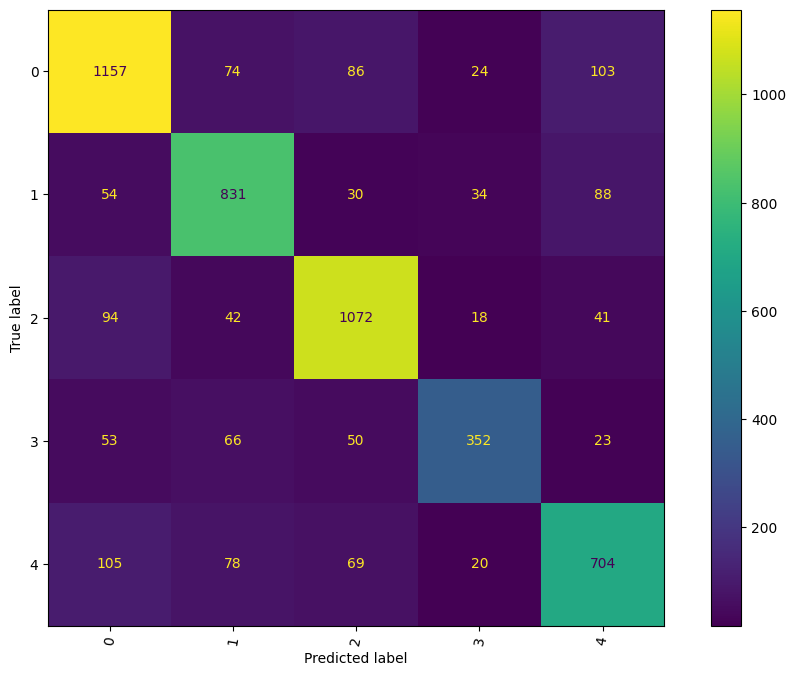

In [107]:
dtc = DecisionTreeClassifier(random_state=40)

dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}

# create gridsearch object
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

# fit model
grid_search_dtc.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_dtc)

# Random Forest Classification Report
metric7=[]
display_classification_report(grid_search_dtc,metric7)

### Random Forest Classifier with GridSearchCV

Fitting 5 folds for each of 80 candidates, totalling 400 fits
OOB SCORE : 0.80403695267021
Best Score:  0.9714892486585306
Best Hyperparameters:  {'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 700}
ROC AUC Score Train: 0.99
ROC AUC Score Test: 0.97
Train Accuracy : 0.91
Test Accuracy : 0.81
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      4331
           1       0.94      0.91      0.93      3109
           2       0.91      0.96      0.94      3801
           3       0.96      0.75      0.84      1633
           4       0.96      0.85      0.91      2930

    accuracy                           0.91     15804
   macro avg       0.93      0.89      0.91     15804
weighted avg       0.92      0.91      0.91     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83      1444
           1       0.83      0.72

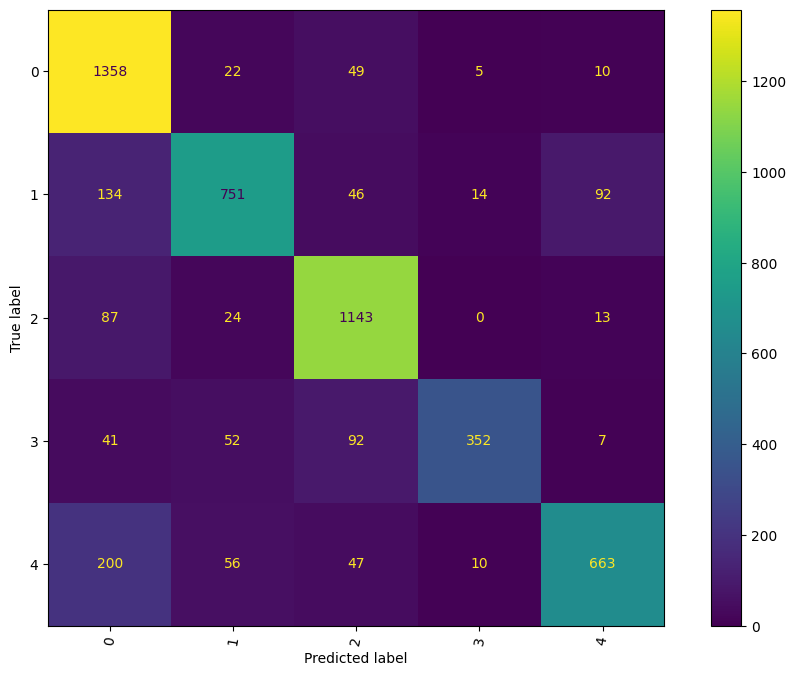

In [108]:
rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)

# hyperparameters for Random Forest
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }

# create gridsearch object
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')

# fit model
grid_search_rfc.fit(X_train, y_train)

# oob score
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

# print best hyperparameters
print_best_score_params(grid_search_rfc)

# Random Forest Classification Report
metric8=[]
display_classification_report(grid_search_rfc,metric8)

## Consolidating view of all the models and their metrics

In [109]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ],
        'Multinomial Naive Bayes': metric1
        }

mnb_metric = pd.DataFrame(table ,columns = ['Metric', 'Multinomial Naive Bayes'] )
log_metric = pd.Series(metric2, name = 'Logistic Regression')
dtc_metric = pd.Series(metric3, name = 'Decision Tree Classifier')
rfc_metric = pd.Series(metric4, name = 'Random Forest Classifier')
grid_mnb_metric = pd.Series(metric5, name = 'Multinomial Naive Bayes with GridSearchCV')
grid_log_metric = pd.Series(metric6, name = 'Logistic Regression with GridSearchCV')
grid_dtc_metric = pd.Series(metric7, name = 'Decision Tree Classifier with GridSearchCV')
grid_rfc_metric = pd.Series(metric8, name = 'Random Forest Classifier with GridSearchCV')

final_metric = pd.concat([mnb_metric,log_metric,dtc_metric,rfc_metric,
                         grid_mnb_metric,grid_log_metric,grid_dtc_metric,grid_rfc_metric], axis = 1)

final_metric

,Metric,Multinomial Naive Bayes,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,Multinomial Naive Bayes with GridSearchCV,Logistic Regression with GridSearchCV,Decision Tree Classifier with GridSearchCV,Random Forest Classifier with GridSearchCV
0,ROC_AUC Score(Train),0.95,1.00,1.00,1.00,0.98,1.00,0.97,0.99
1,ROC_AUC Score(Test),0.94,0.99,0.86,0.98,0.95,0.99,0.93,0.97
2,Accuracy(Train),0.68,0.95,1.00,1.00,0.85,0.94,0.82,0.91
3,Accuracy(Test),0.65,0.90,0.77,0.83,0.76,0.92,0.78,0.81
4,Precision(Train),0.75,0.95,1.00,1.00,0.85,0.94,0.82,0.92
5,Precision(Test),0.73,0.90,0.78,0.83,0.77,0.92,0.78,0.82
6,Recall(Train),0.68,0.95,1.00,1.00,0.85,0.94,0.82,0.91
7,Recall(Test),0.65,0.90,0.77,0.83,0.76,0.92,0.78,0.81
8,F1-Score(Train),0.66,0.95,1.00,1.00,0.85,0.94,0.82,0.91
9,F1-Score(Test),0.62,0.90,0.78,0.83,0.76,0.92,0.78,0.81


The best model looks to be Logistic Regression with GridSearchCV

In [115]:
sample_complaint = "I was trying to check my account balance using my debit card. I was getting error message that the  bank is currently not available. But you can still make the payments or withdraw the money.' Please help."

* Text Preprocessing

In [116]:
sample_complaint = clean_text(sample_complaint)
sample_complaint = lemmatizer(sample_complaint)
sample_complaint = pos_tag(sample_complaint)
sample_complaint

'account balance debit card error message bank payment withdraw money'

* Vectorize and tf-idf tranform

In [117]:
test = count_vect.transform([sample_complaint])
test_tfidf = tfidf_transformer.transform(test)

* Prediction

In [118]:
pred = grid_search_log.predict(test_tfidf)
pred

array([1])

* topic mapping

In [123]:
pred

array([1])

In [125]:
# Let us check the Topic_name
Topic_name

{'Bank Account services': 0,
 'Credit card or prepaid card': 1,
 'Others': 2,
 'Theft/Dispute Reporting': 3,
 'Mortgage/Loan': 4}

In [126]:
# Let us reverse it to check out predictions which is in the numeric form
Topic_name = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

In [127]:
# Now let us predict the above custom complaint
Topic_name[pred[0]]

'Credit card or prepaid card'